In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-05-17_102646_Tc/')

In [4]:
print(npd.metadata.script_code)

from time import sleep

import numpy as np

from kid_readout.settings import CRYOSTAT
from kid_readout.roach import hardware_tools
from kid_readout.measurement import core, basic, acquire

# Parameters
wait = 60
length_seconds = 0.1
offset_frequency = np.linspace(10, 200, 16)
num_tone_samples = 2**15
lo_frequency = 3000

# Hardware
ri = hardware_tools.r2_with_mk2()
ri.set_dac_atten(50)
ri.set_fft_gain(4)
ri.set_lo(lomhz=lo_frequency)
ri.set_tone_freqs(freqs=lo_frequency + offset_frequency, nsamp=num_tone_samples)
ri.select_fft_bins(np.arange(offset_frequency.size))

# State
state = {'cryostat': CRYOSTAT,
         'canceling_magnet': {'orientation': 'up',
                              'distance_from_base_mm': 25}}

# Acquire
sweep = basic.SweepArray(core.IOList(), state=state, description="T_c measurement")
name = 'sweep'
npd = acquire.new_npy_directory(suffix='Tc')
npd.write(sweep, name)
try:
    while True:
        sweep.stream_arrays.append(ri.get_measurement(num_seconds=length_secon

In [5]:
print(npd.metadata.git_log)

commit f9ad65af0d67b60cb41c917f7c36561d16aa8df3
Author: Daniel Flanigan <daniel.isaiah.flanigan@gmail.com>
Date:   Mon May 16 16:05:08 2016 -0400

    Reorganization of acquisition code.
    
    Moved measurement/acquire/hardware.py to equipment/hardware.py
    Moved measurement/acquire/acquire.py -> measurement/acquire.py
    Consolidated io.helpers.py into acquire.py
    Created measurement/legacy but didn't move all legacy-related code there yet.



In [6]:
sa = npd.sweep

In [7]:
sa.description

u'T_c measurement'

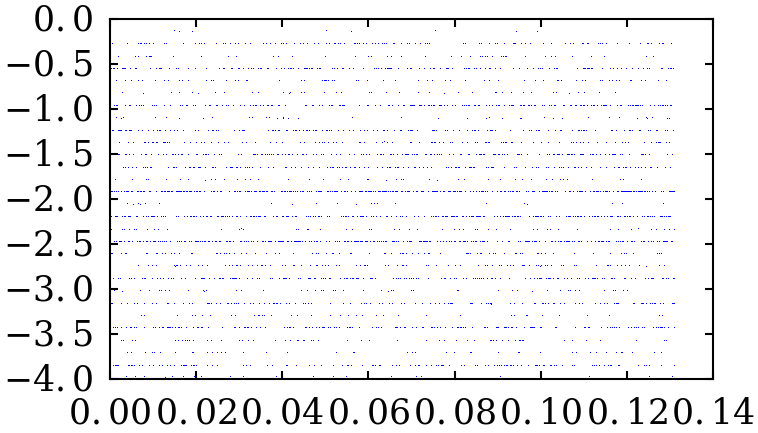

In [8]:
fig, ax = plt.subplots()
ax.set_ylim(-4, 0)
ax.plot(sa[0].streams[0].sample_time, np.real(sa[0].streams[0].s21_raw), ',b')

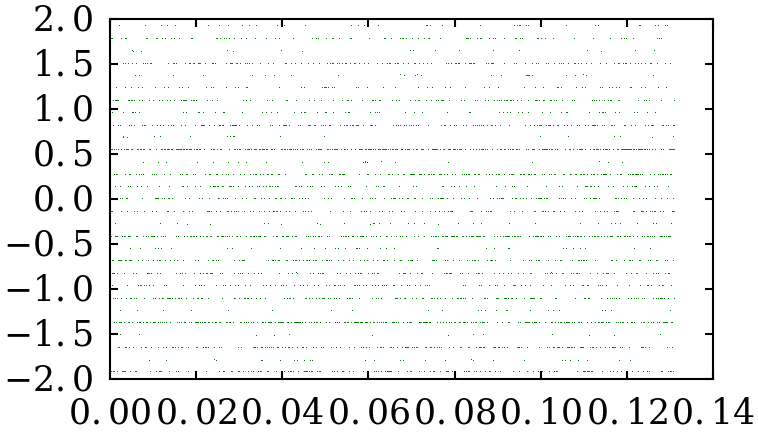

In [9]:
fig, ax = plt.subplots()
ax.set_ylim(-2, 2)
ax.plot(sa[0].streams[0].sample_time, np.imag(sa[0].streams[0].s21_raw), ',g')

In [11]:
unique_real = np.unique(np.real(sa[0].streams[0].s21_raw))
unique_imag = np.unique(np.imag(sa[0].streams[0].s21_raw))

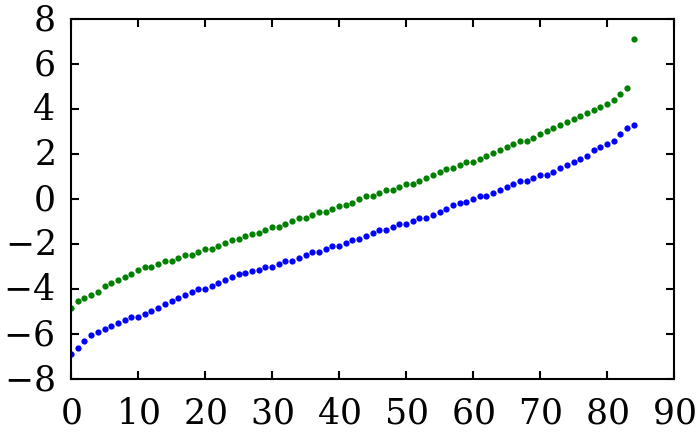

In [12]:
fig, ax = plt.subplots()
ax.plot(unique_real, '.b')
ax.plot(unique_imag, '.g')

In [13]:
np.diff(unique_real)

array([ 0.27341127,  0.2734108 ,  0.2734108 ,  0.14166451,  0.13174677,
        0.14166451,  0.13174629,  0.14166451,  0.13174629,  0.00991821,
        0.13174629,  0.14166451,  0.13174677,  0.14166403,  0.13174677,
        0.14166451,  0.13174629,  0.14166451,  0.13174653,  0.00991797,
        0.13174653,  0.14166451,  0.13174653,  0.14166427,  0.13174653,
        0.00991797,  0.12182856,  0.00991797,  0.13174653,  0.00991797,
        0.13174653,  0.13174653,  0.00991774,  0.13174653,  0.14166451,
        0.13174653,  0.00991797,  0.13174653,  0.13174653,  0.00991797,
        0.13174641,  0.13174653,  0.00991797,  0.13174641,  0.14166451,
        0.13174653,  0.00991786,  0.13174653,  0.13174653,  0.00991797,
        0.13174647,  0.13174647,  0.00991797,  0.13174653,  0.14166445,
        0.13174647,  0.14166448,  0.13174649,  0.00991796,  0.1317465 ,
        0.1317465 ,  0.00991796,  0.13174649,  0.14166448,  0.13174647,
        0.14166445,  0.13174653,  0.00991797,  0.13174647,  0.13

In [19]:
np.diff(unique_imag)

array([ 0.2734108 ,  0.14166451,  0.13174629,  0.14166451,  0.27341104,
        0.13174653,  0.14166451,  0.14166427,  0.13174653,  0.14166451,
        0.13174653,  0.00991797,  0.13174653,  0.13174653,  0.00991774,
        0.13174653,  0.13174653,  0.00991797,  0.13174653,  0.13174653,
        0.00991797,  0.13174653,  0.14166439,  0.13174653,  0.00991797,
        0.13174641,  0.13174653,  0.00991797,  0.13174653,  0.13174641,
        0.00991797,  0.13174653,  0.14166445,  0.13174647,  0.00991797,
        0.13174653,  0.13174647,  0.00991797,  0.13174647,  0.1317465 ,
        0.00991797,  0.13174649,  0.14166446,  0.1317465 ,  0.00991796,
        0.13174649,  0.1317465 ,  0.00991797,  0.13174647,  0.13174653,
        0.00991791,  0.13174653,  0.14166445,  0.13174647,  0.14166451,
        0.13174653,  0.00991786,  0.13174653,  0.13174653,  0.00991797,
        0.13174641,  0.14166451,  0.13174641,  0.14166451,  0.13174653,
        0.14166451,  0.13174653,  0.00991797,  0.13174653,  0.14

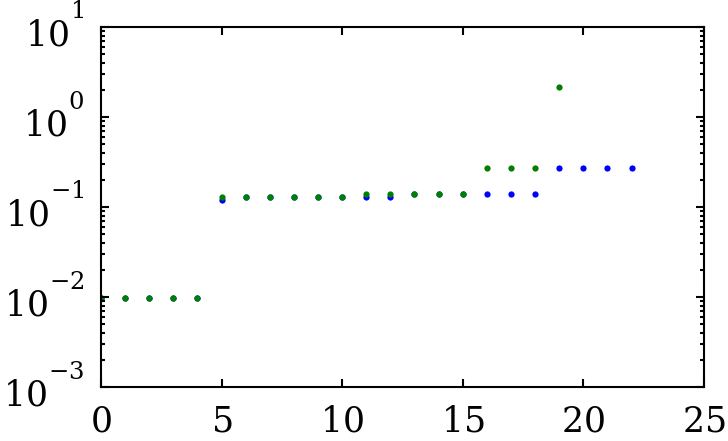

In [23]:
fig, ax = plt.subplots()
ax.semilogy(np.unique(np.diff(unique_real)), '.b')
ax.semilogy(np.unique(np.diff(unique_imag)), '.g')

In [14]:
min_diff = np.min(np.diff(unique_real))

In [15]:
np.min(np.diff(unique_real))

0.0099177361

In [16]:
np.min(np.diff(unique_imag))

0.0099177361

In [17]:
unique_real / min_diff

array([-692.19708252, -664.62915039, -637.0612793 , -609.4934082 ,
       -595.20947266, -581.92553711, -567.64154053, -554.35766602,
       -540.07373047, -526.78979492, -525.78973389, -512.50585938,
       -498.22189331, -484.93792725, -470.65402222, -457.37005615,
       -443.08612061, -429.80221558, -415.51824951, -402.23431396,
       -401.23428345, -387.9503479 , -373.66641235, -360.38247681,
       -346.09854126, -332.81460571, -331.8145752 , -319.53067017,
       -318.53063965, -305.2467041 , -304.2467041 , -290.96276855,
       -277.67883301, -276.67883301, -263.39489746, -249.11094666,
       -235.82701111, -234.82698059, -221.5430603 , -208.25912476,
       -207.25909424, -193.97517395, -180.69125366, -179.69122314,
       -166.40730286, -152.12335205, -138.8394165 , -137.83940125,
       -124.55547333, -111.27153778, -110.27151489,  -96.98758698,
        -83.70366669,  -82.70363617,  -69.41970825,  -55.13575745,
        -41.85183334,  -27.56787872,  -14.28395176,  -13.28392

In [18]:
unique_imag / min_diff

array([-484.93792725, -457.37005615, -443.08612061, -429.80221558,
       -415.51824951, -387.9503479 , -374.66641235, -360.38247681,
       -346.09854126, -332.81460571, -318.53063965, -305.2467041 ,
       -304.2467041 , -290.96276855, -277.67883301, -276.67883301,
       -263.39489746, -250.11096191, -249.11094666, -235.82701111,
       -222.54307556, -221.5430603 , -208.25912476, -193.97517395,
       -180.69125366, -179.69122314, -166.40730286, -153.12336731,
       -152.12335205, -138.8394165 , -125.55549622, -124.55547333,
       -111.27153778,  -96.98758698,  -83.70366669,  -82.70363617,
        -69.41970825,  -56.13578033,  -55.13575745,  -41.85183334,
        -28.56790352,  -27.56787872,  -14.28395176,    0.        ,
         13.28392887,   14.28395176,   27.56787872,   40.85180664,
         41.85183334,   55.13575745,   68.41969299,   69.41970825,
         82.70363617,   96.98758698,  110.27151489,  124.55547333,
        137.83940125,  138.8394165 ,  152.12335205,  165.40727